<a href="https://colab.research.google.com/github/phuri7987/229351-StatisticalLearning/blob/main/229351_LAB07_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [20]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-07 17:53:30--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-07 17:53:31 (39.8 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [21]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [22]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

# Set the frequency of the DatetimeIndex
data.index.freq = 'MS'

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


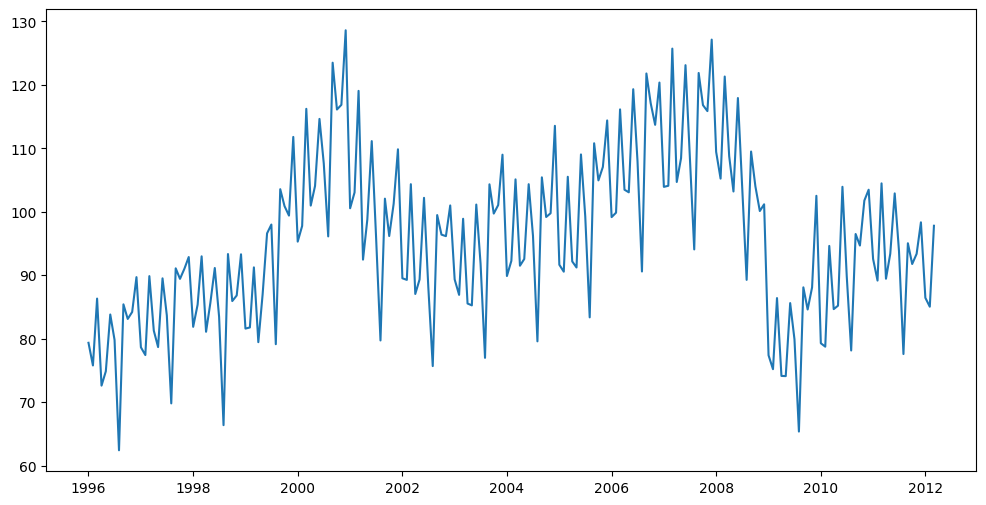

In [23]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [24]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [25]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [26]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


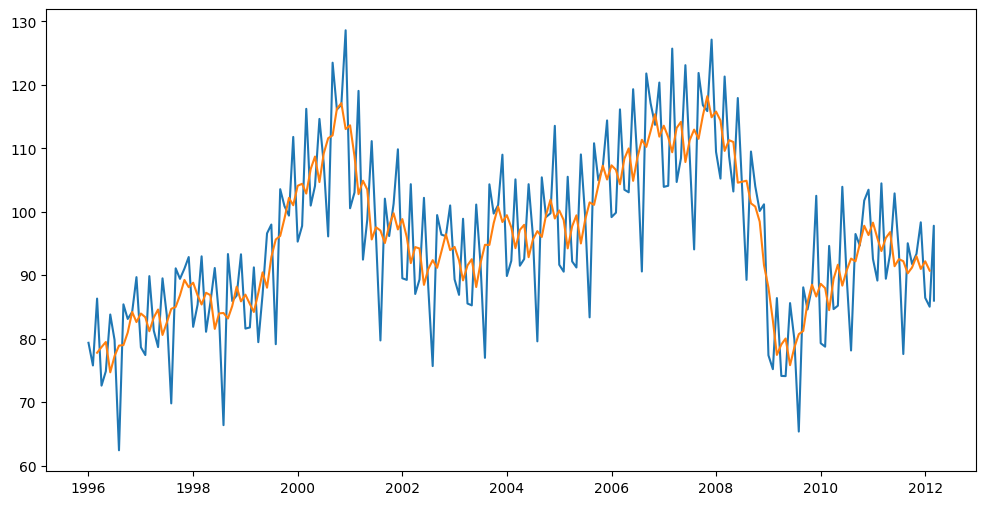

In [27]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

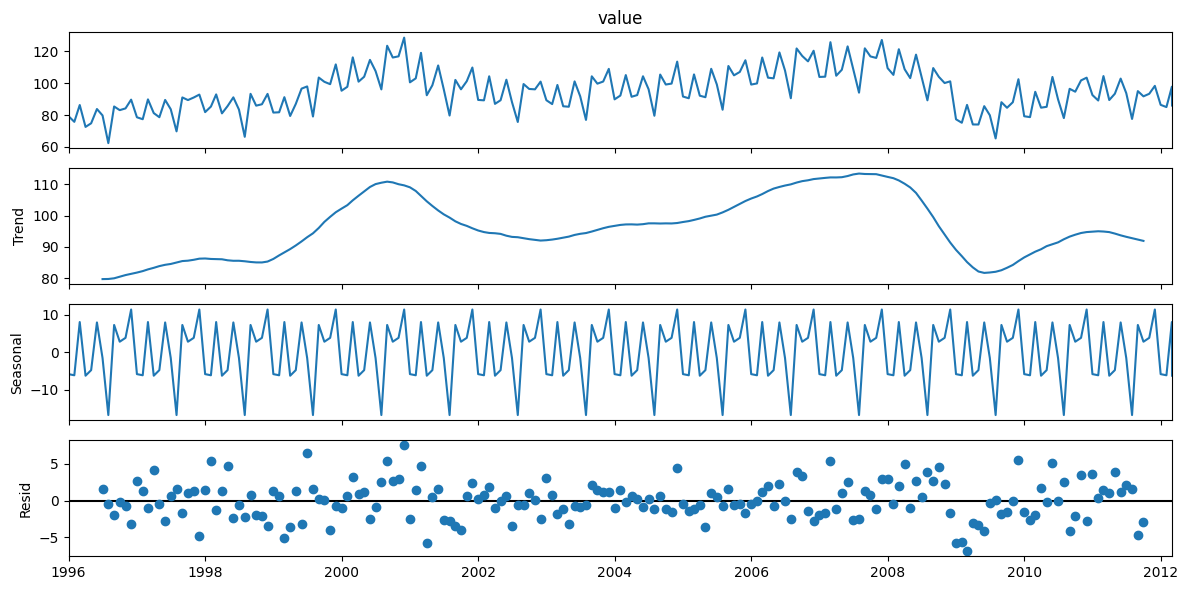

In [32]:
# Perform the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period=12)

result_add.plot();

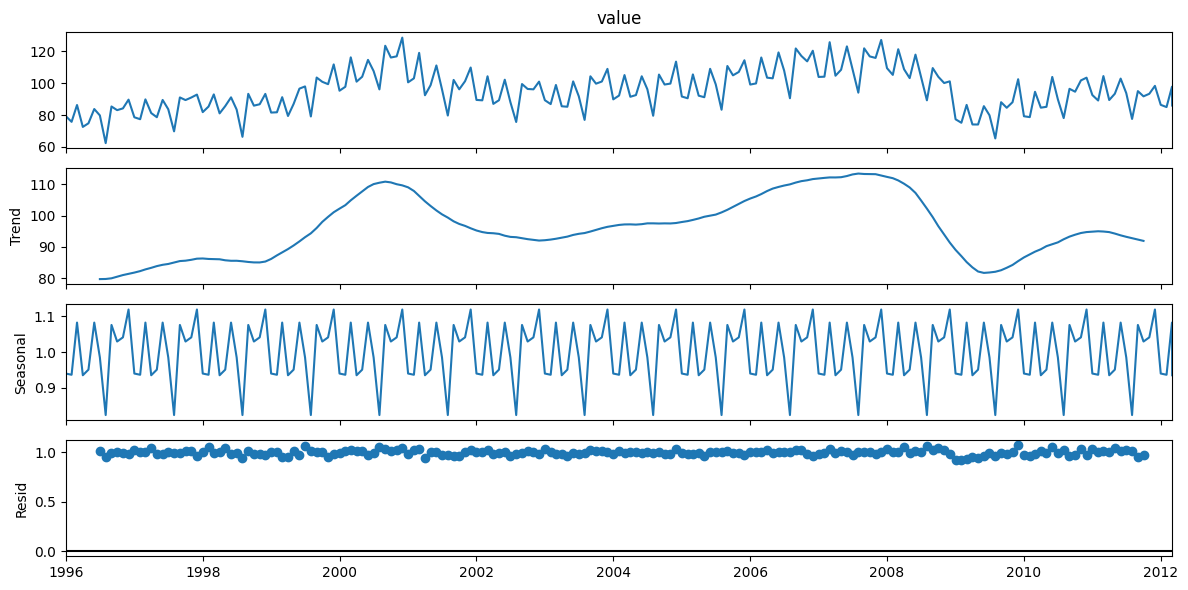

In [35]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [36]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Freq: MS, Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Freq: MS, Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Freq: MS, Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-0

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

1.1

In [37]:
# Split data into training and test sets
train_data = data.loc['1996-01-01':'2009-12-01']
test_data = data.loc['2010-01-01':'2012-03-01']

# Display the shapes of the resulting dataframes
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

# Display the last few rows of the training set to confirm the end date
print("\nLast rows of training set:")
display(train_data.tail())

# Display the first few rows of the test set to confirm the start date
print("\nFirst rows of test set:")
display(test_data.head())

Training set shape: (168, 3)
Test set shape: (27, 3)

Last rows of training set:


,Unnamed: 0,value,MA
time,,,
2009-08-01,164.0,65.36,80.712
2009-09-01,165.0,88.09,81.208
2009-10-01,166.0,84.60,85.732
2009-11-01,167.0,88.09,88.516
2009-12-01,168.0,102.52,86.646



First rows of test set:


,Unnamed: 0,value,MA
time,,,
2010-01-01,169.0,79.28,88.650
2010-02-01,170.0,78.74,87.964
2010-03-01,171.0,94.62,84.500
2010-04-01,172.0,84.66,89.432
2010-05-01,173.0,85.20,91.658


1.2

/tmp/ipython-input-1559497407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['T'] = result.trend
/tmp/ipython-input-1559497407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['S'] = result.seasonal
/tmp/ipython-input-1559497407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

            value          T          S         R
time                                             
1996-01-01  79.35        NaN  -5.985857       NaN
1996-02-01  75.78        NaN  -5.957941       NaN
1996-03-01  86.32        NaN   8.183245       NaN
1996-04-01  72.60        NaN  -6.462428       NaN
1996-05-01  74.86        NaN  -5.041178       NaN
1996-06-01  83.81        NaN   7.552989       NaN
1996-07-01  79.80  79.750417  -1.640954  1.690537
1996-08-01  62.41  79.789167 -17.138902 -0.240264
1996-09-01  85.41  80.005000   8.178886 -2.773886
1996-10-01  83.11  80.513750   3.378341 -0.782091
1996-11-01  84.21  81.034167   3.644335 -0.468502
1996-12-01  89.70  81.430833  11.289463 -3.020296
1997-01-01  78.64  81.829583  -5.985857  2.796274
1997-02-01  77.42  82.298750  -5.957941  1.079191
1997-03-01  89.86  82.843333   8.183245 -1.166579


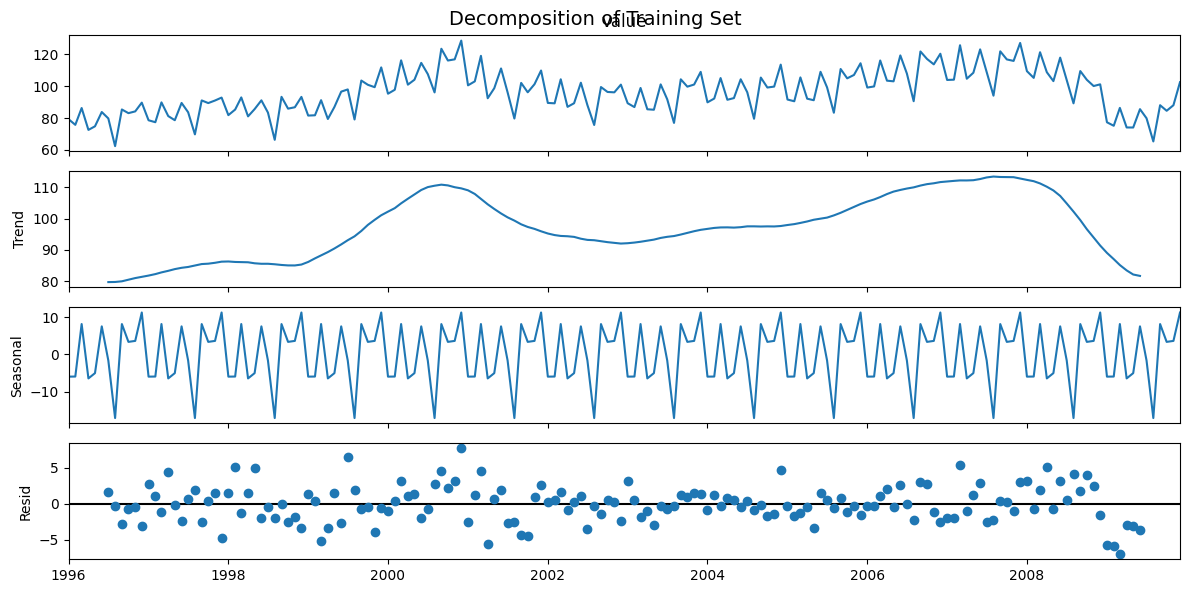

In [39]:
# ใช้คอลัมน์ value จาก training set
train_series = train_data['value']

# แยกส่วนประกอบ (additive model, ข้อมูลรายเดือน => period=12)
result = seasonal_decompose(train_series, model='additive', period=12)

# เอาค่าแต่ละส่วนประกอบมาเก็บใน DataFrame
train_data['T'] = result.trend
train_data['S'] = result.seasonal
train_data['R'] = result.resid

# ดูผลลัพธ์บางส่วน
print(train_data[['value','T','S','R']].head(15))

# พล็อตกราฟ decomposition
result.plot()
plt.suptitle("Decomposition of Training Set", fontsize=14)
plt.show()

1.3

ใช้ค่า T_last+R_last จาก 2009-06-01 00:00:00: 78.057
             value          S  y_forecast
time                                     
2010-01-01   79.28  -5.985857   72.071154
2010-02-01   78.74  -5.957941   72.099071
2010-03-01   94.62   8.183245   86.240256
2010-04-01   84.66  -6.462428   71.594583
2010-05-01   85.20  -5.041178   73.015833
2010-06-01  103.94   7.552989   85.610000
2010-07-01   89.87  -1.640954   76.416058
2010-08-01   78.14 -17.138902   60.918109
2010-09-01   96.50   8.178886   86.235897
2010-10-01   94.68   3.378341   81.435353
2010-11-01  101.77   3.644335   81.701346
2010-12-01  103.48  11.289463   89.346474


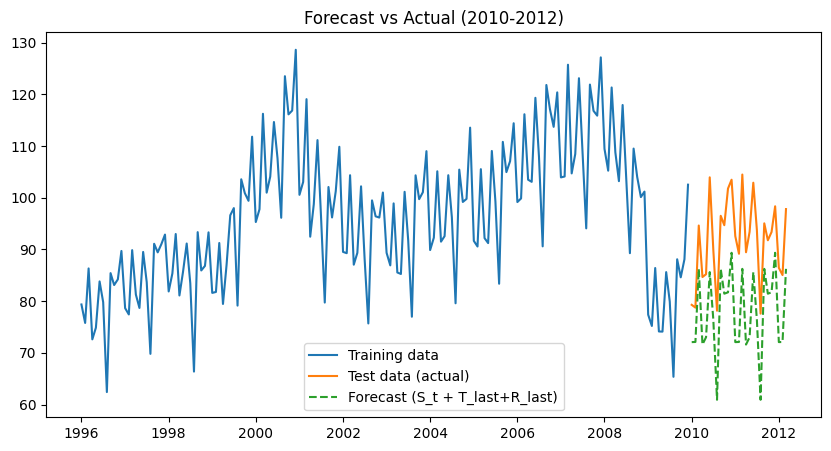

In [40]:
# 1) หา T_last + R_last (วันสุดท้ายที่ trend ไม่เป็น NaN)
valid_train = train_data.dropna(subset=['T'])
last_date = valid_train.index.max()
T_last = valid_train.loc[last_date, 'T']
R_last = valid_train.loc[last_date, 'R']
offset = T_last + R_last
print(f"ใช้ค่า T_last+R_last จาก {last_date}: {offset:.3f}")

# 2) สร้าง seasonal component (S_t) ของช่วง test set
seasonal_test = []
for dt in test_data.index:
    month = dt.month
    # ดึง seasonal pattern ของเดือนเดียวกันจาก training set
    s_val = train_data.loc[train_data.index.month == month, 'S'].mean()
    seasonal_test.append(s_val)

seasonal_test = pd.Series(seasonal_test, index=test_data.index, name="S")


# 3) Forecast = S_t + (T_last+R_last)
forecast = seasonal_test + offset
forecast.name = "y_forecast"


# 4) รวมผลลัพธ์เข้ากับ test set
result_df = pd.concat([test_data['value'], seasonal_test, forecast], axis=1)
print(result_df.head(12))


# 5) วาดกราฟ
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_data['value'], label="Training data")
plt.plot(test_data['value'], label="Test data (actual)")
plt.plot(forecast, label="Forecast (S_t + T_last+R_last)", linestyle="--")
plt.legend()
plt.title("Forecast vs Actual (2010-2012)")
plt.show()

2.

In [41]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

y_true = test_data['value']
y_pred = forecast

# คำนวณ RMSE
rmse_value = rmse(y_true, y_pred)
print(f"RMSE on test set: {rmse_value:.3f}")

RMSE on test set: 14.590


3.

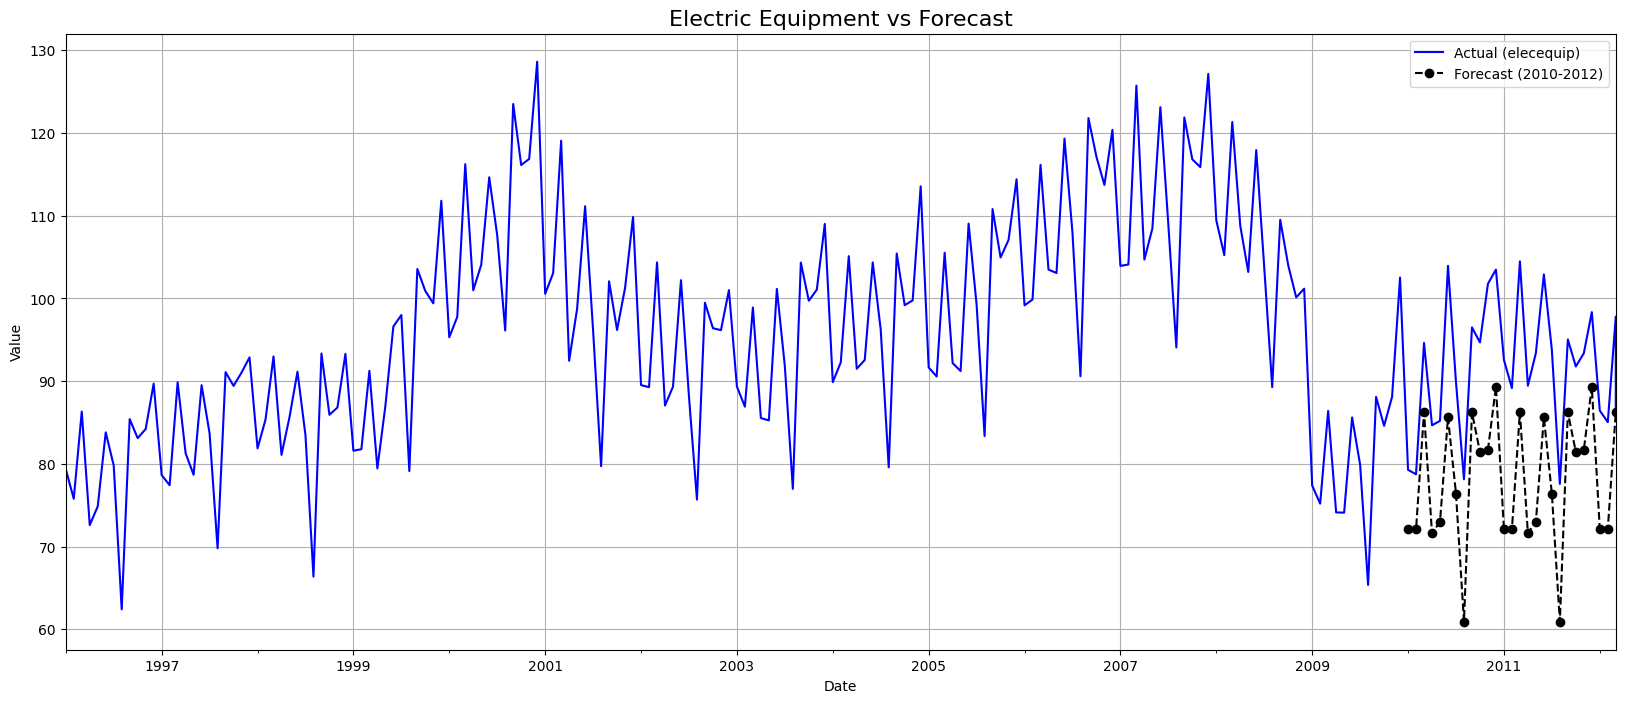

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))

# ข้อมูลจริง elecequip (ทั้งชุด)
data['value'].plot(ax=ax, color='blue', label='Actual (elecequip)')

# ค่าทำนาย ts_new
forecast.plot(ax=ax, marker='o', color='black', linestyle='--', label='Forecast (2010-2012)')

# ตกแต่งกราฟ
ax.set_title("Electric Equipment vs Forecast", fontsize=16)
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()
ax.grid(True)

plt.show()